### Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import time
import warnings
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Ananta Arora\Documents\data\diabetes.csv")


In [3]:
#set column names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
print("Diabetes data set dimensions : {}".format(df.shape))

Diabetes data set dimensions : (768, 9)


In [5]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [6]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

####  We can identify that out of the 768 persons, 500 are labeled as 0 (non-diabetic) and 268 as 1 (diabetic)

### Data Cleaning

In [8]:
df.isnull().sum() #or df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data Visualisation

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

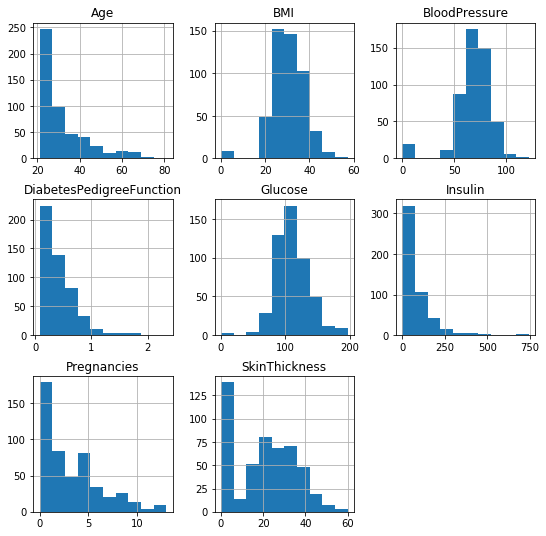

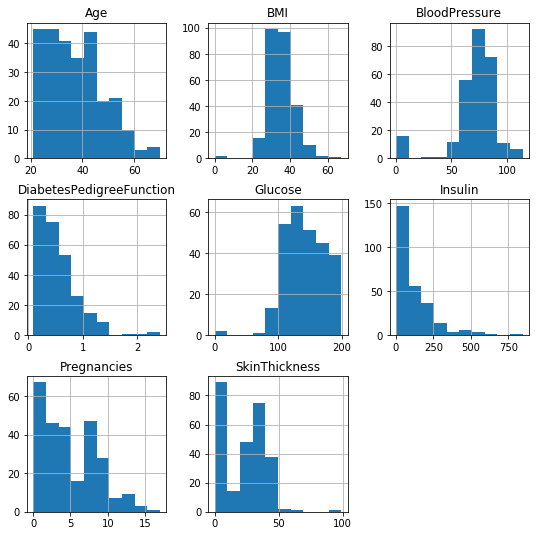

In [7]:
df.groupby("Outcome").hist(figsize=(9, 9))


In [9]:
cor = df.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


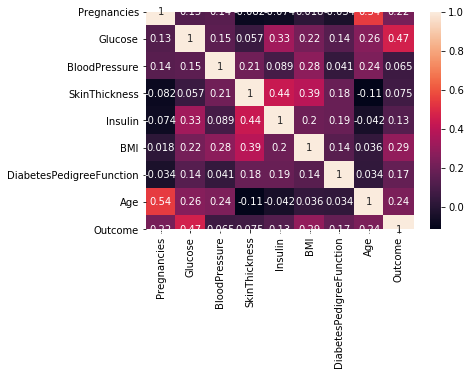

In [10]:
sns.heatmap(cor,annot =True)

#### Observations:
- Glucose,Age,BMI and Pregnancies are the most correlated parameters with the Outcome.
- Insulin and DiabetesPedigreeFunction have little correlation with the outcome.
- BloodPressure and SkinThickness have tiny correlation with the outcome.
- There is a little correlation between Age and Pregnancies,Insulin and Skin Thickness, BMI and Skin Thickness,Insulin and Glucose.

#### Another way of finding the correlated features

In [20]:
correlated_features = set()
correlation_matrix = df_mod.drop('Outcome', axis =1).corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

correlated_features

set()

#### This dataset contains no correlation matrix

In [21]:
# Changing the value 0.8 to 0.4
correlated_features = set()
correlation_matrix = df_mod.drop('Outcome', axis =1).corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.4:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

correlated_features

{'Age', 'BMI', 'Insulin'}

In [22]:
pd.crosstab(df['Pregnancies'], df['Outcome'])
### Crosstab gives the frequency table information

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


### Blood Pressure

#### Observations:
- The data seems wrong because a living person cannot have a diastolic blood pressure of zero.
- Lets find out the zero counts

In [12]:
print("Total: ", df[df.BloodPressure == 0].shape[0])

Total:  35


In [13]:
print(df[df.BloodPressure == 0].groupby('Outcome')['Age'].count())

Outcome
0    19
1    16
Name: Age, dtype: int64


### Plasma Glucose Levels:
- Even after fasting glucose levels would not be as low as zero.

In [14]:
print("Total: ", df[df.Glucose == 0].shape[0])

Total:  5


- Observing the data we can see 5 counts where the value is 0.

In [15]:
print(df[df.Glucose == 0].groupby('Outcome')['Age'].count())

Outcome
0    3
1    2
Name: Age, dtype: int64


### BMI: 
- Should not be 0 or close to zero unless the person is really underweight which could be life-threatening.

In [16]:
print("Total : ", df[df.BMI == 0].shape[0])

print(df[df.BMI == 0].groupby('Outcome')['Age'].count())


Total :  11
Outcome
0    9
1    2
Name: Age, dtype: int64


### Insulin:
- In a rare situation a person can have zero insulin but by observing the data, we can find that there is a total of 374 counts

In [17]:
print("Total : ", df[df.Insulin == 0].shape[0])

print(df[df.Insulin == 0].groupby('Outcome')['Age'].count())

Total :  374
Outcome
0    236
1    138
Name: Age, dtype: int64


We will remove the rows which the “BloodPressure”, “BMI” and “Glucose” are zero.

In [18]:
df_mod = df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]

In [19]:
print(df_mod.shape)

(724, 9)


In [20]:
df_mod.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df_mod[feature_names]
y = df_mod.Outcome
Y = df_mod['Outcome']

### Model Selection

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [25]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = df_mod.Outcome,test_size=0.1, random_state=0)

- We stratify (a process where each response class should be represented with equal proportions in each of the portions) the samples

In [27]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


  Name     Score
0  KNN  0.794521
1  SVC  0.657534
2   LR  0.753425
3   DT  0.753425
4  GNB  0.767123
5   RF  0.794521
6   GB  0.808219


In [28]:
from sklearn.model_selection import KFold
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid th

  Name     Score
0  KNN  0.719787
1  SVC  0.656279
2   LR  0.766781
3   DT  0.685255
4  GNB  0.757021
5   RF  0.765354
6   GB  0.775038


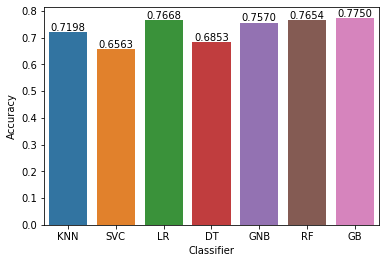

In [29]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

#### Gradient Boost classifier has the highest accuracy

### Feature Selection
- Methods that help to understand feature importance:
            - Univariate Feature Selection
            - Recursive Feature Elimination
            - Principal Component Analysis
            - Feature Importance
            


- Univariate Feature Selection : Statistical tests can be used to select those features that have the strongest relationship with the output variable.

- Recursive Feature Elimination : The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.
- Principal Component Analysis : Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form. Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.

- Feature Importance : Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In [30]:
X.values

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [31]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 724, dtype: int64

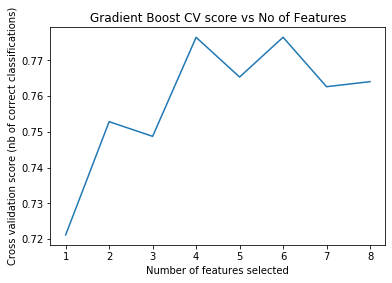

In [81]:
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_friedman1
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold 

strat_k_fold = StratifiedKFold(n_splits=10, random_state=1)
gb_model = GradientBoostingClassifier()
gb_rfecv = RFECV(estimator=gb_model, step=1, cv=strat_k_fold, scoring='accuracy')
gb_rfecv.fit(X,y)
plt.figure()
plt.title('Gradient Boost CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(gb_rfecv.grid_scores_) + 1), gb_rfecv.grid_scores_)
plt.show()

- grid_scores_ which returns a list of accuracy scores for each of the features selected.
- RFECV exposes support_ which is another attribute to find out the features which contribute the most to predicting.

In [78]:
print(feature_names)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [33]:
feature_importance = list(zip(feature_names, gb_rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


#### Important features

In [93]:
print(np.where(gb_rfecv.support_ == True)[0])

[0 1 4 5 6 7]


#### Least important features

In [90]:
print(np.where(gb_rfecv.support_ == False)[0])

[2 3]


In [91]:
gb_rfecv.estimator_.feature_importances_

array([0.04887752, 0.41019071, 0.05132995, 0.2135494 , 0.13358835,
       0.14246407])

In [92]:
print('Optimal number of features: {}'.format(gb_rfecv.n_features_))

Optimal number of features: 6


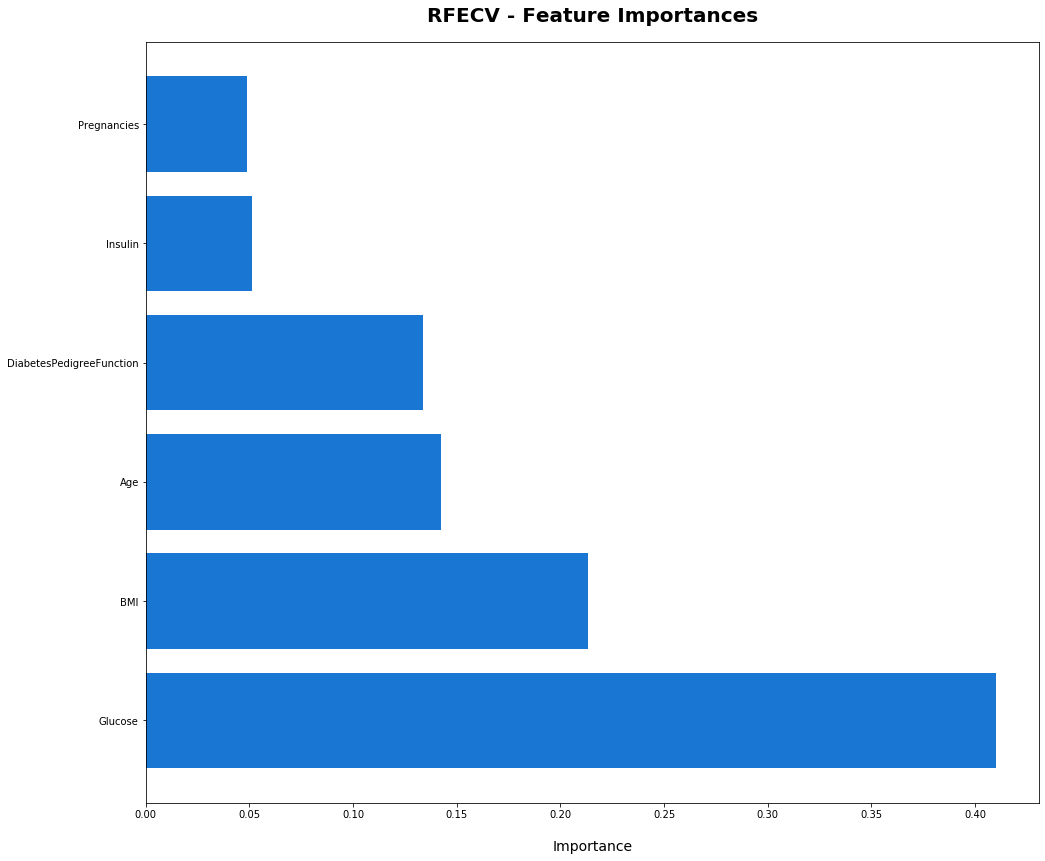

In [95]:
dset = pd.DataFrame()
dset['attr'] = new_features
dset['importance'] = gb_rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

#### We can either drop the least important features or use the new features variable to compute the accuracy

**The above 6 features are most suitable for the model. We can compare the accuracy before and after feature selection.**

In [40]:
X_new_gb = df_mod[new_features]
print(X_new_gb.shape)
print(y.shape)
initial_score = cross_val_score(gb_model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(gb_model, X_new_gb, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

(724, 6)
(724,)
Initial accuracy : 0.766811906446288 
Accuracy after Feature Selection : 0.7847157909404678 


#### We can see that there is an increase in accuracy after the feature selection

- We can similarily try this on second best model

### Hyperparameter Tuning
- Scikit Learn provides the model with sensible default parameters which gives decent accuracy scores.
-  Using the GridSearchCV, which does an “exhaustive search over specified parameter values for an estimator”

In [41]:
from sklearn.model_selection import GridSearchCV

- Then we fit the data to the GridSearchCV, which performs a K-fold cross validation on the data for the given combinations of the parameters. 
- This might take a little while to finish.

In [74]:
param_grid = {'n_estimators':range(20,81,10)}

grid = GridSearchCV(gb_model, param_grid, cv=strat_k_fold, scoring='accuracy',n_jobs=4,iid=False)
grid.fit(X_new_gb, y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=False),
             error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_

- GridSearchCV provides some useful attributes to find the best parameters and the best estimator.

In [75]:
print(grid.best_params_)
print(grid.best_estimator_)

{'n_estimators': 80}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#### Using the best parameters

In [76]:
gb_new = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

initial_score = cross_val_score(gb_new, X_new_gb, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Final accuracy : {} ".format(initial_score))


Final accuracy : 0.7805866400840354 
